# 高纬数据向低维映射

对于数据集X

$
X =
\begin {pmatrix}
X_1 {(1)} & X_2 {(1)} & \cdots & X_n {(1)} \\
X_1 {(2)} & X_2 {(2)} & \cdots & X_n {(2)} \\
\vdots & \vdots & \vdots & \vdots \\
X_1 {(m)} & X_2 {(m)} & \cdots & X_n {(m)} \\
\end {pmatrix}
$

其前k个主成分是

$
W_k =
\begin {pmatrix}
W_1 {(1)} & W_2 {(1)} & \cdots & W_n {(1)} \\
W_1 {(2)} & W_2 {(2)} & \cdots & W_n {(2)} \\
\vdots & \vdots & \vdots & \vdots \\
W_1 {(k)} & W_2 {(k)} & \cdots & W_n {(k)} \\
\end {pmatrix}
$

将n维数据转换为k维

$X \cdot W_k^T = X_k$

其中矩阵$X$是`m*n`, $W_k^T$是`n*k`, 故结果$X_k$是`m*k`,如此便从n维转换到k维

In [6]:
class PCA:
    def __init__(self, n_components):
        assert n_components >= 1, "n_components must be valid"
        self.n_components = n_components
        self.components_ = None
    
    def __repr(self):
        return "PCA(n_components=%d)" % self.n_components
    
    def fit(self, X, eta=0.01, n_iters=1e4):
        """计算数据集前n个主成分"""
        assert self.n_components <= X.shape[1], \
            "n_components must not be greater than the feature number of X"

        def demean(X):
            return X - np.mean(X, axis=0)

        def f(w, X):
            return np.sum((X.dot(w) ** 2)) / len(X)

        def df(w, X):
            return X.T.dot(X.dot(w)) * 2. / len(X)

        def direction(w):
            return w / np.linalg.norm(w)

        def first_component(X, initial_w, eta=0.01, n_iters=1e4, epsilon=1e-8):

            w = direction(initial_w)
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = df(w, X)
                last_w = w
                w = w + eta * gradient
                w = direction(w)
                if (abs(f(w, X) - f(last_w, X)) < epsilon):
                    break

                cur_iter += 1

            return w

        X_pca = demean(X)
        self.components_ = np.empty(shape=(self.n_components, X.shape[1]))
        for i in range(self.n_components):
            initial_w = np.random.random(X_pca.shape[1])
            w = first_component(X_pca, initial_w, eta, n_iters)
            self.components_[i,:] = w

            X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w

        return self
    
    def transform(self, X):
        """将给定的X，映射到各个主成分分量中"""
        assert X.shape[1] == self.components_.shape[1]

        return X.dot(self.components_.T)

    def inverse_transform(self, X):
        """将给定的X，反向映射回原来的特征空间"""
        assert X.shape[1] == self.components_.shape[0]

        return X.dot(self.components_)

    def __repr__(self):
        return "PCA(n_components=%d)" % self.n_components

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [7]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [8]:
pca.components_

array([[ 0.77581613,  0.63095906],
       [-0.63095537,  0.77581913]])

In [9]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [11]:
X_reduction = pca.transform(X)

In [13]:
X_reduction.shape

(100, 1)

In [14]:
X_restore = pca.inverse_transform(X_reduction)

In [15]:
X_restore.shape

(100, 2)

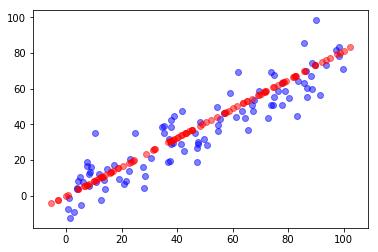

In [16]:
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color='r', alpha=0.5)
plt.show()